In [2]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


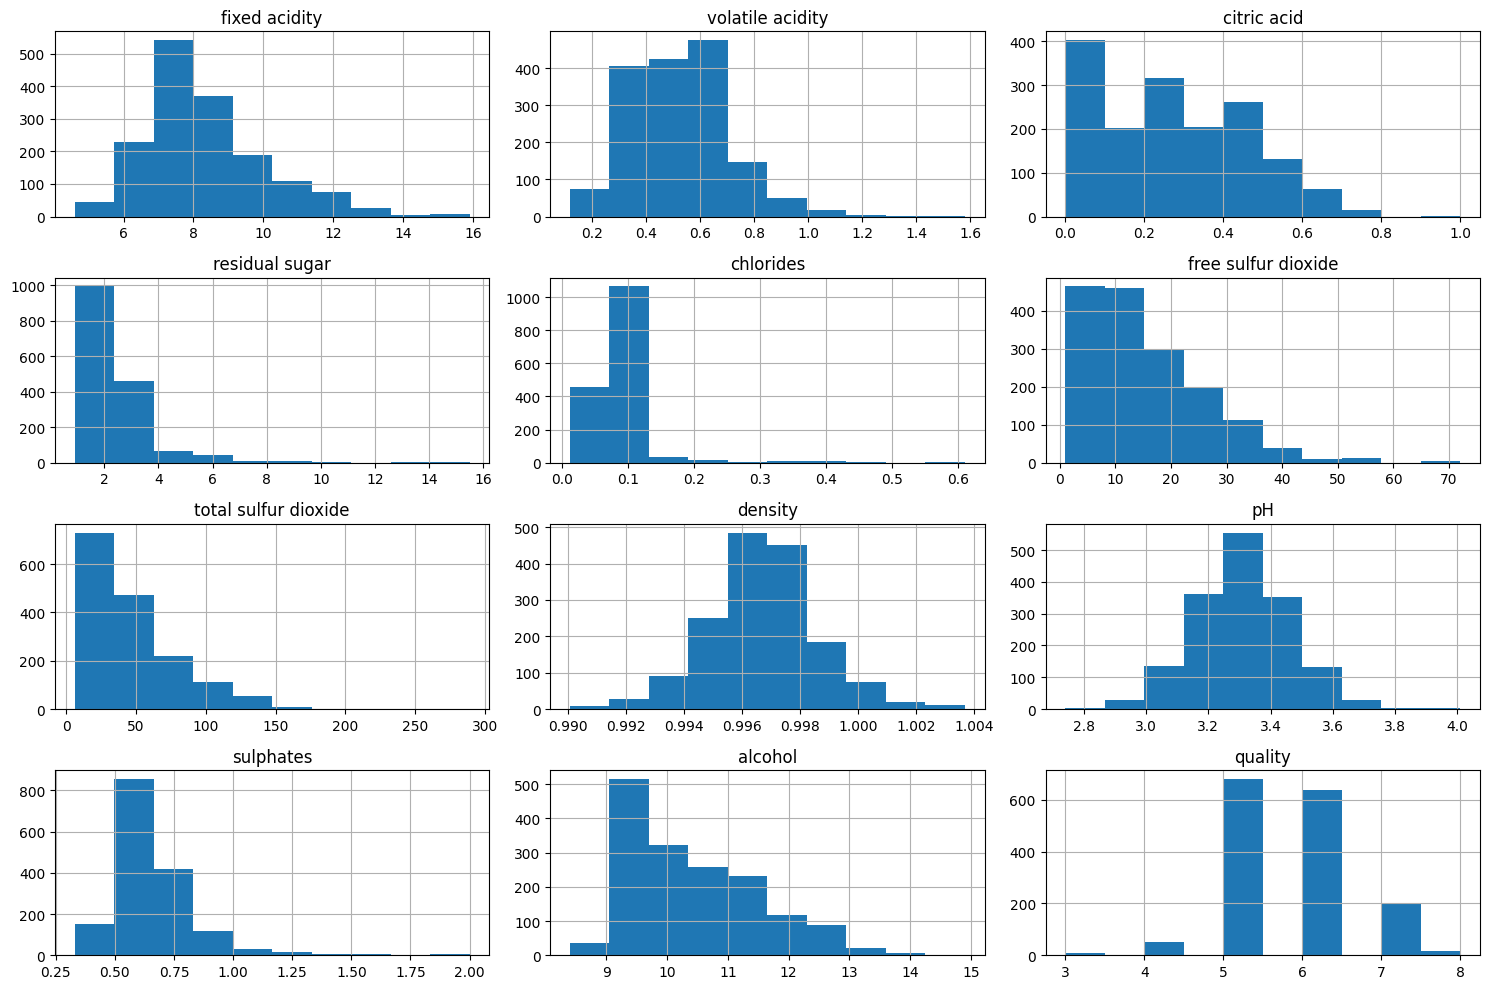

In [5]:
import matplotlib.pyplot as plt

# Histograms for the distribution of each feature
data.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

c:\Users\YANSILIYU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YANSILIYU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YANSILIYU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YANSILIYU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

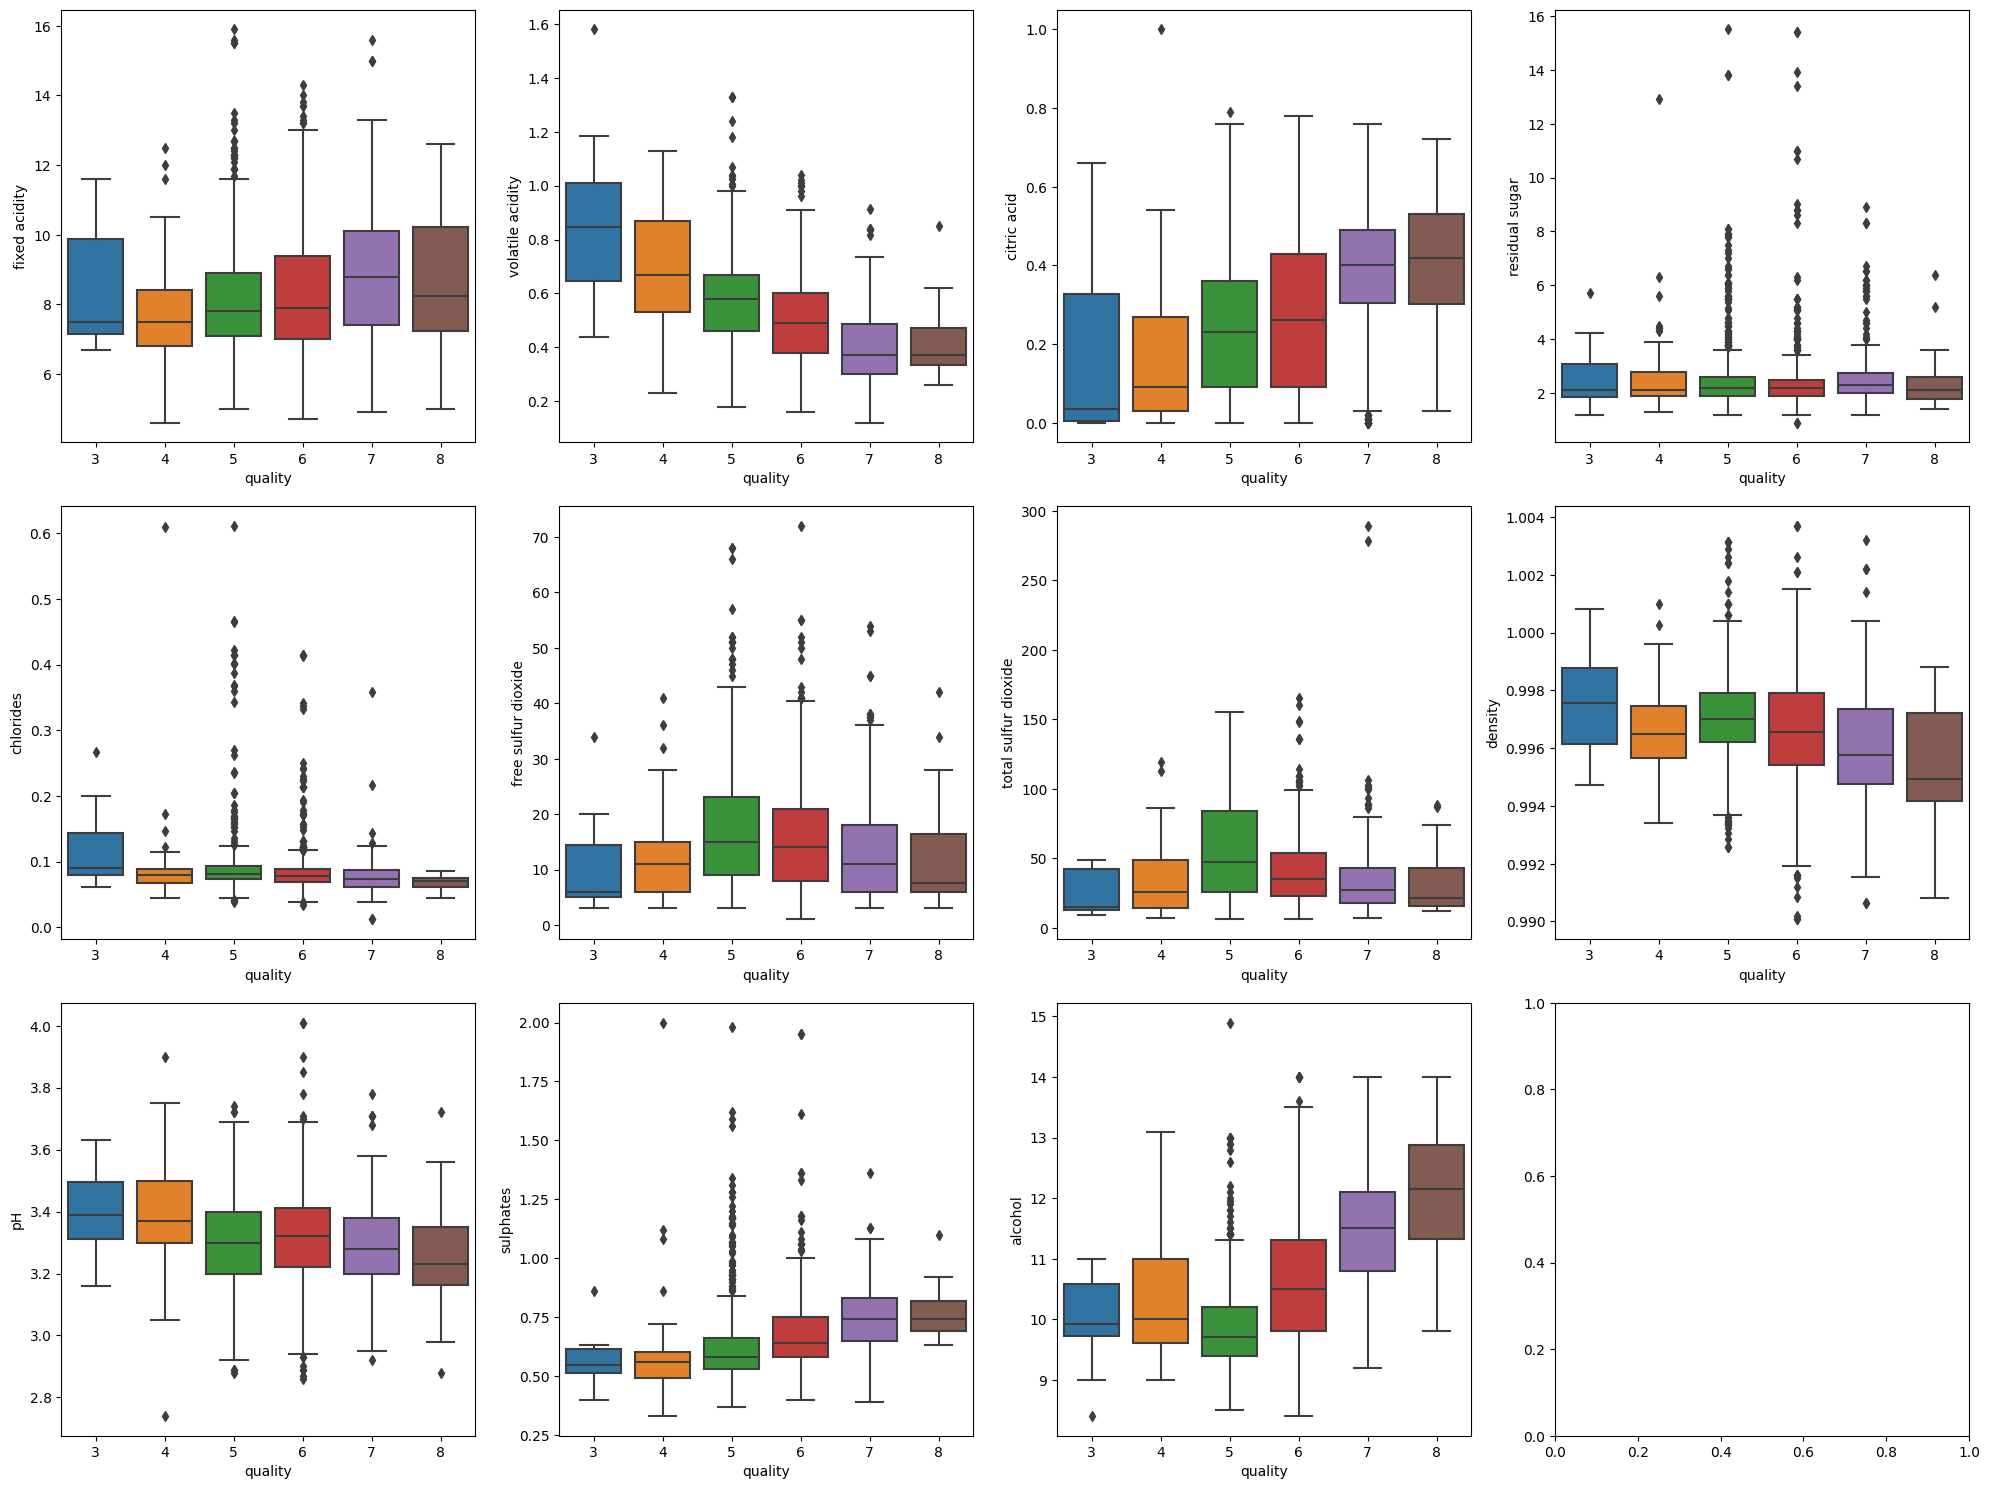

In [6]:
import seaborn as sns
features = data.drop(['quality'], axis=1)
# Box plots for features by quality

n_features = features
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, feature in enumerate(n_features):
    sns.boxplot(x='quality', y=feature, data=data, ax=axs[i//4, i%4])
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models 
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
}

# Dictionary to hold model scores for easy comparison
model_scores = {}

# Loop through models, fit, predict, and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store scores in dictionary
    model_scores[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display model scores
for model_name, scores in model_scores.items():
    print(f"{model_name}:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.3f}")


Random Forest:
  MAE: 0.443
  MSE: 0.349
  R2: 0.449
Decision Tree:
  MAE: 0.469
  MSE: 0.644
  R2: -0.015
Linear Regression:
  MAE: 0.513
  MSE: 0.411
  R2: 0.351


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [120, 300],  # Number of trees
    'max_depth': [None, 15, 50],  # Maximum depth of trees
    'min_samples_split': [4, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [3, 6],  # Minimum number of samples required at each leaf node
}

# Initialize the grid search model
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=15, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


Fitting 15 folds for each of 24 candidates, totalling 360 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best score for Random Forest: 0.4484457667246683


Hyperparameter Tuning:

Each model you used has hyperparameters that can be optimized. For instance:
For the Random Forest and Decision Tree, you might experiment with max_depth, min_samples_split, and min_samples_leaf.
For Linear Regression, if regularization is applicable, you might consider trying Ridge or Lasso regression models which come with regularization parameters.
Consider using techniques like Grid Search or Random Search to systematically explore different combinations of hyperparameters.

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train_scaled, y_train are already defined
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_

# Map features to their importances
feature_importances = zip(X.columns, importances)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


alcohol: 0.29247140704343466
sulphates: 0.14931013965928833
volatile acidity: 0.10998904645451694
total sulfur dioxide: 0.07720131313894522
chlorides: 0.06349183236209052
residual sugar: 0.05714833920762018
pH: 0.056231515807770485
density: 0.050421470729432025
fixed acidity: 0.04984005014194867
citric acid: 0.04721381140821643
free sulfur dioxide: 0.04668107404673665


In [10]:
# Example: Select the top N features
N = 5  # Number of features to keep
selected_features = [feature for feature, importance in feature_importances[:N]]
# Assuming 'selected_features' contains the names of the features you want to keep
feature_indices = [list(X.columns).index(feature) for feature in selected_features]

# Select the columns corresponding to the selected features by their indices
X_train_reduced = X_train_scaled[:, feature_indices]
X_test_reduced = X_test_scaled[:, feature_indices]

# Re-train a model as an example
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
    # Store scores in dictionary
model_scores[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display model scores
for model_name, scores in model_scores.items():
    print(f"{model_name}:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.3f}")



Random Forest:
  MAE: 0.443
  MSE: 0.349
  R2: 0.449
Decision Tree:
  MAE: 0.469
  MSE: 0.644
  R2: -0.015
Linear Regression:
  MAE: 0.442
  MSE: 0.355
  R2: 0.440


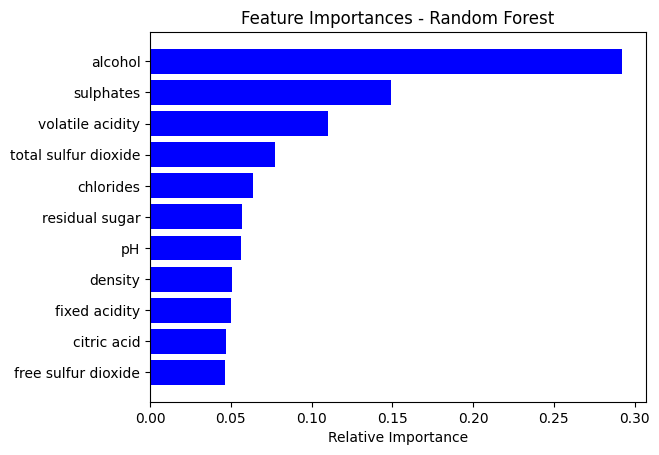

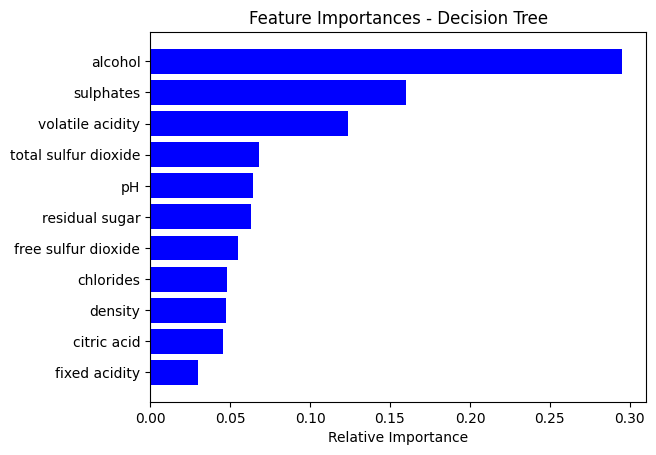

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [11]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

 
    # Get feature importances
    importances = model.feature_importances_

    # Plot feature importances
    indices = np.argsort(importances)
    plt.title(f'Feature Importances - {name}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [data.columns[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [ ]:
X = data[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'chlorides', 'citric acid']]
y = data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models 
models = {
    "Random Forrest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
}

# Initialize dictionary to store evaluation metrics
metrics = {
    "Accuracy": {},
    "F1 Score": {},
    "Recall": {},
    "Precision": {}
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    metrics["Accuracy"][name] = accuracy_score(y_test, y_pred)
    metrics["F1 Score"][name] = f1_score(y_test, y_pred, average="macro")
    metrics["Recall"][name] = recall_score(y_test, y_pred, average="macro")
    metrics["Precision"][name] = precision_score(y_test, y_pred, average="macro", zero_division=0)

metrics

{'Accuracy': {'Random Forrest': 0.65, 'Decision Tree': 0.5458333333333333},
 'F1 Score': {'Random Forrest': 0.35421185377899506,
  'Decision Tree': 0.30885301421247846},
 'Recall': {'Random Forrest': 0.343340339078044,
  'Decision Tree': 0.30624815584073056},
 'Precision': {'Random Forrest': 0.3945913532185794,
  'Decision Tree': 0.3126898498708802}}